# Cleaning Data Exercises

For the exercises, you will be cleaning data in your chosen data set. [Towards Data Science](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d) outlines the steps we should take to clean data using a different data set from Kaggle. While you should use this article as a reference, make sure not to copy paste as the two data sets are very different!

To start cleaning data, we first need to create a dataframe from the CSV and print out any relevant info to make sure our dataframe is ready to go.

In [1]:
# Import pandas and any other libraries you need here. HINT: Check out the article to see what they imported to get started!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None
# Create a new dataframe from your CSV
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')


In [2]:
# Print out any information you need to understand your dataframe
# shape and data types of the data
print(df.shape)
print(df.dtypes)

# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

(23486, 11)
Unnamed: 0                  int64
Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object
['Unnamed: 0' 'Clothing ID' 'Age' 'Rating' 'Recommended IND'
 'Positive Feedback Count']
['Title' 'Review Text' 'Division Name' 'Department Name' 'Class Name']


In [3]:
df[non_numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            19676 non-null  object
 1   Review Text      22641 non-null  object
 2   Division Name    23472 non-null  object
 3   Department Name  23472 non-null  object
 4   Class Name       23472 non-null  object
dtypes: object(5)
memory usage: 917.5+ KB


In [4]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Unnamed: 0               23486 non-null  int64
 1   Clothing ID              23486 non-null  int64
 2   Age                      23486 non-null  int64
 3   Rating                   23486 non-null  int64
 4   Recommended IND          23486 non-null  int64
 5   Positive Feedback Count  23486 non-null  int64
dtypes: int64(6)
memory usage: 1.1 MB


Now you have a dataframe set up, you are ready to dive in and start cleaning!

## Missing Data

In the Towards Data Science article, they list 3 techniques for detecting any missing data frame. Try all three before deciding on a way to solve any missing data issues.

<Axes: >

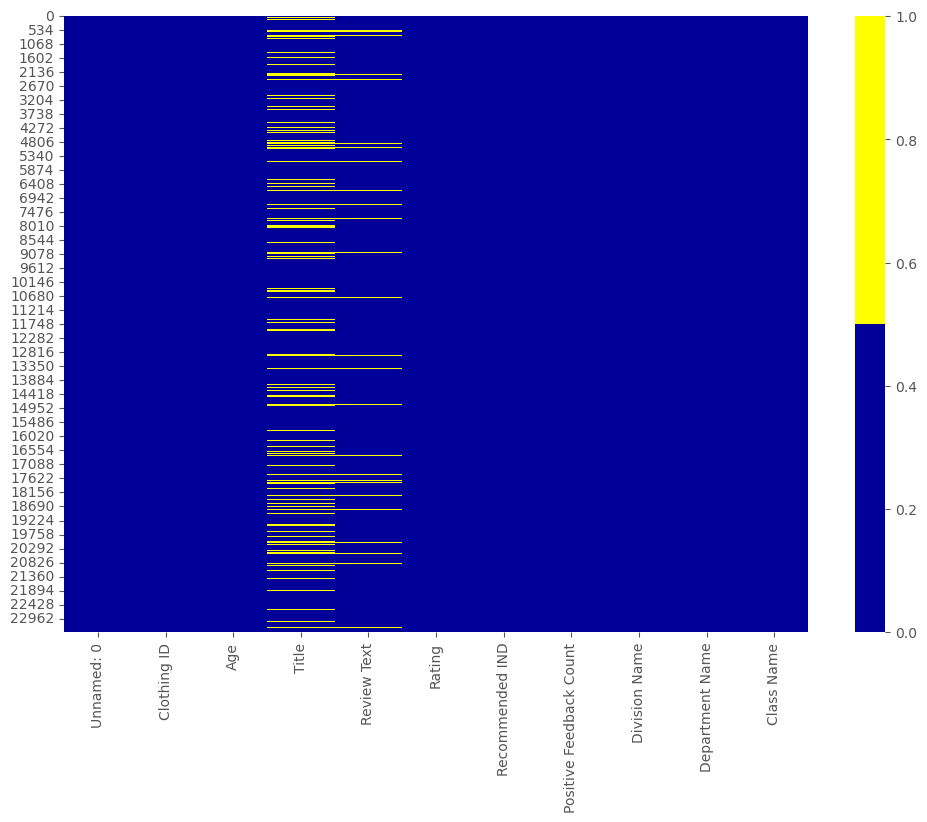

In [5]:
# Plot a heatmap of any missing data
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [6]:
# Try out a missing data percentage list! 
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    

Unnamed: 0 - 0%
Clothing ID - 0%
Age - 0%
Title - 16%
Review Text - 4%
Rating - 0%
Recommended IND - 0%
Positive Feedback Count - 0%
Division Name - 0%
Department Name - 0%
Class Name - 0%


created missing indicator for: Title
created missing indicator for: Review Text
created missing indicator for: Division Name
created missing indicator for: Department Name
created missing indicator for: Class Name


<Axes: xlabel='index'>

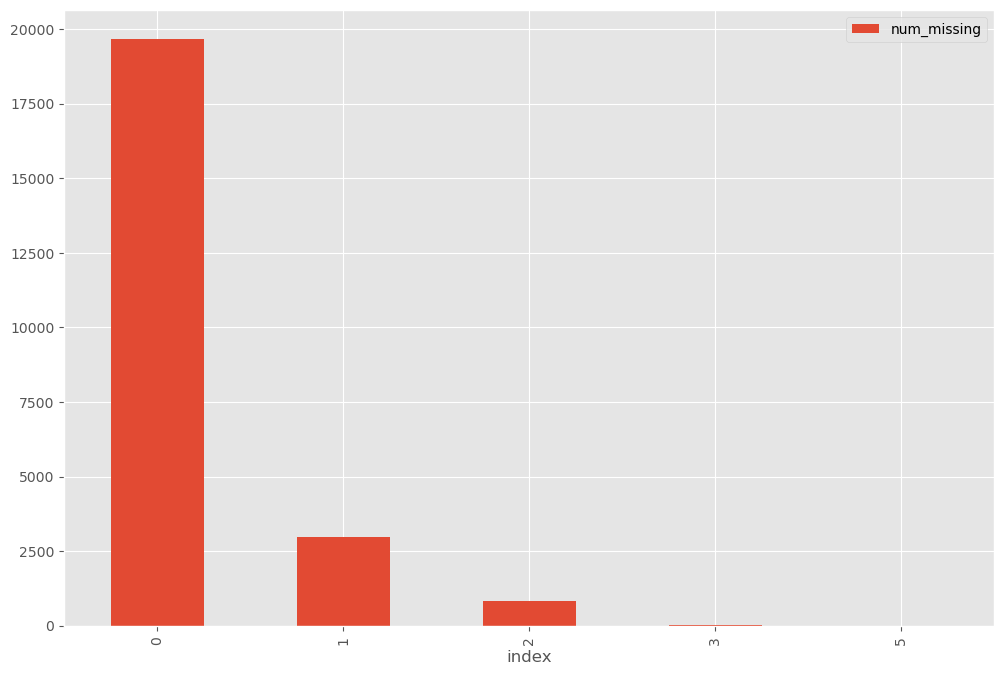

In [7]:
# Plot a missing data histogram
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]

df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

Now that you have tried all 3 techniques for detecting missing data, did you find any? Reading through the article, which solution do you think will help you clean the data set and handle the missing data? Try out your solution below!

In [8]:
# Handle any missing data in your dataframe.

ind_missing = df[df['num_missing'] > 0].index
df_less_missing_rows = df.drop(ind_missing, axis=0)

In [9]:
# Removing title column# drop rows with a lot of missing values.
df_less_title = df_less_missing_rows.drop('Title', axis = 1)

In [10]:
df_less_title.dropna(how = 'any', subset = ['Review Text'], inplace = True)

<Axes: >

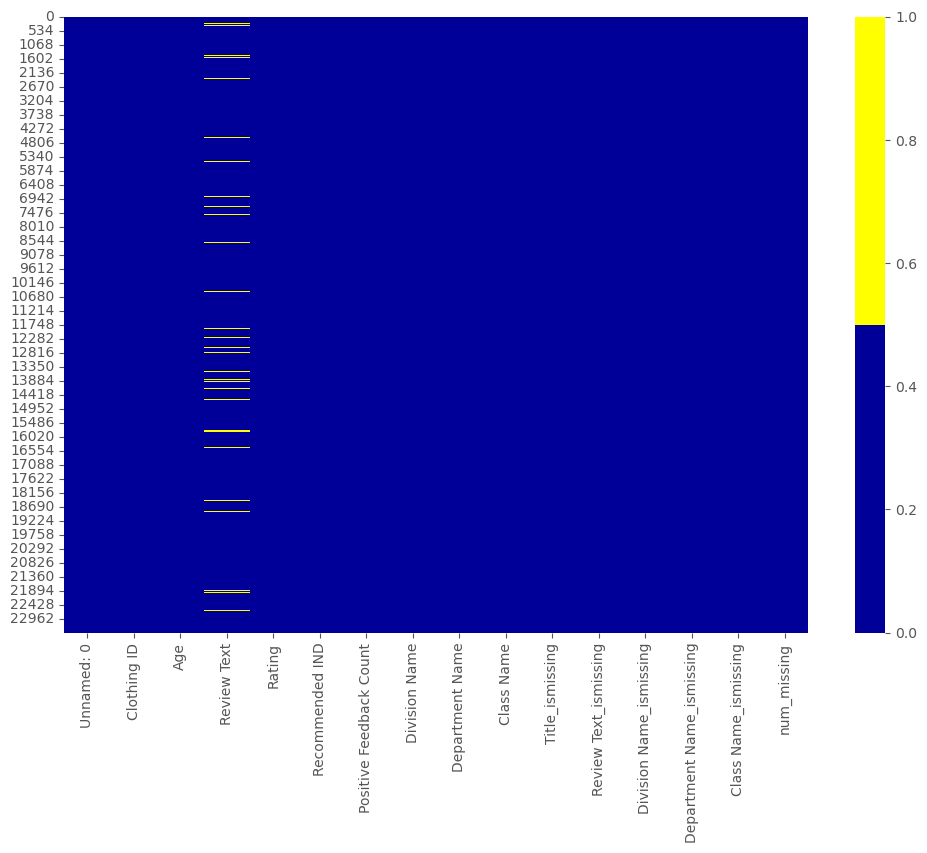

In [12]:
# Plot a heatmap of any missing data
cols = df_less_title.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

## Irregular Data

With missing data out of the way, turn your attention to any outliers. Just as we did for missing data, we first need to detect the outliers. The article outlines the top techniques for finding outliers in a dataset.

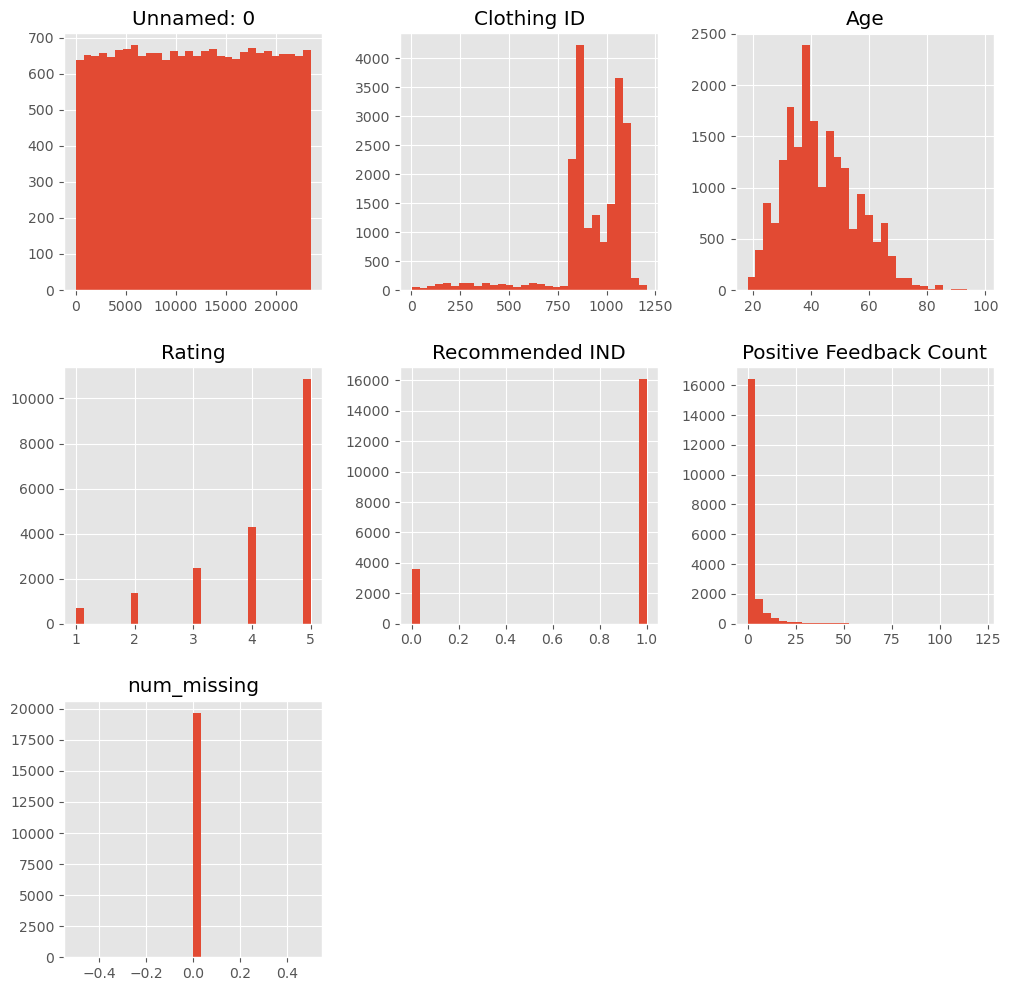

In [13]:
# Plot a histogram to see if there are any outliers.
df_less_title.hist(figsize=(12, 12), bins=30)
plt.show()

In [14]:
# Use the describe() method
df_less_title.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count,num_missing
count,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000,19662.000000,19662.0
mean,11755.260655,921.297274,43.260808,4.183145,0.818177,2.652477,0.0
std,6772.063092,200.227528,12.258122,1.112224,0.385708,5.834285,0.0
min,2.000000,1.000000,18.000000,1.000000,0.000000,0.000000,0.0
25%,5888.250000,861.000000,34.000000,4.000000,1.000000,0.000000,0.0
50%,11749.500000,936.000000,41.000000,5.000000,1.000000,1.000000,0.0
75%,17624.750000,1078.000000,52.000000,5.000000,1.000000,3.000000,0.0
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000,0.0


<Axes: >

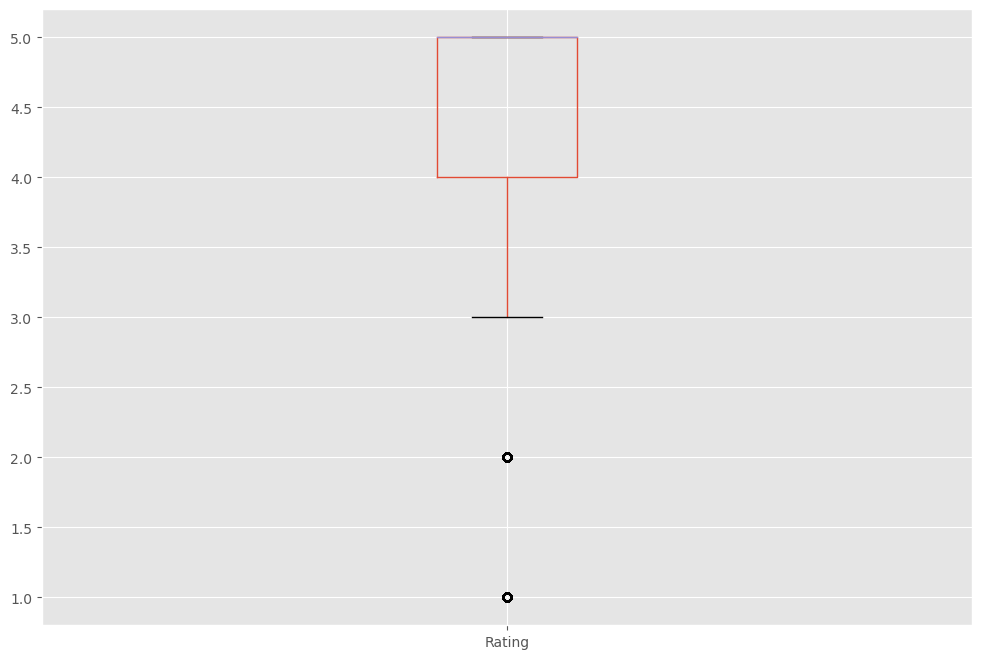

In [15]:
# Plot a bar chart
# box plot.
df_less_title.boxplot(['Rating'])

<Axes: >

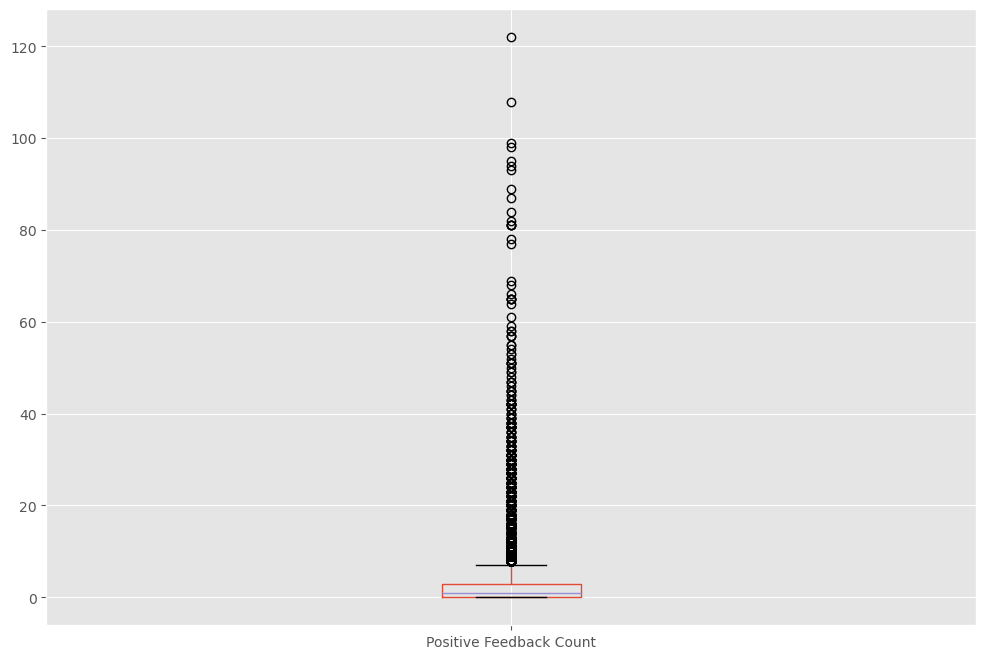

In [16]:
df_less_title.boxplot(['Positive Feedback Count'])

<Axes: >

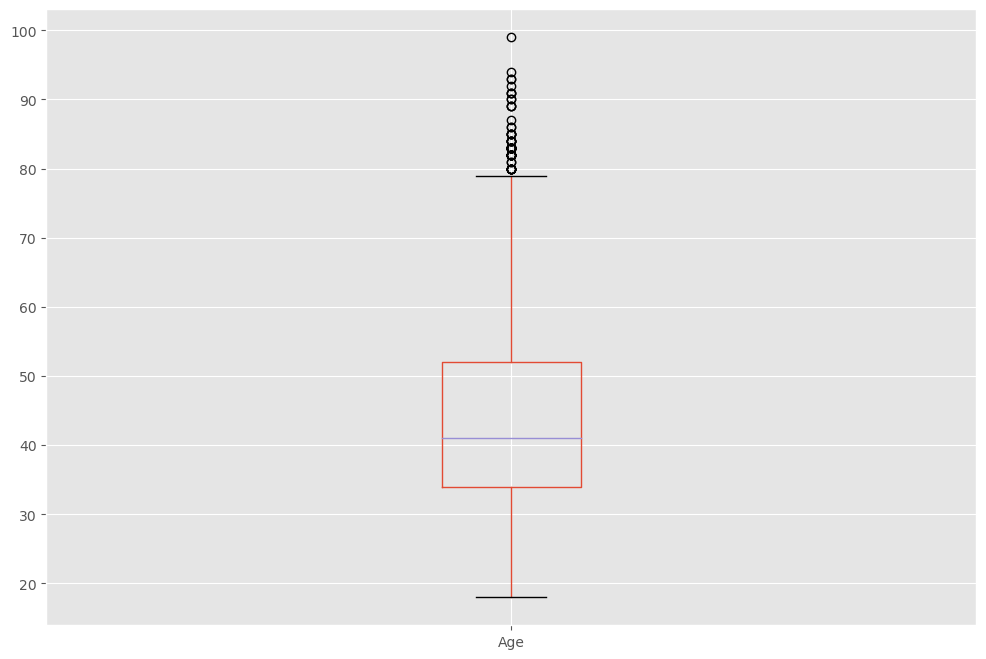

In [17]:
df_less_title.boxplot(['Age'])

<Axes: >

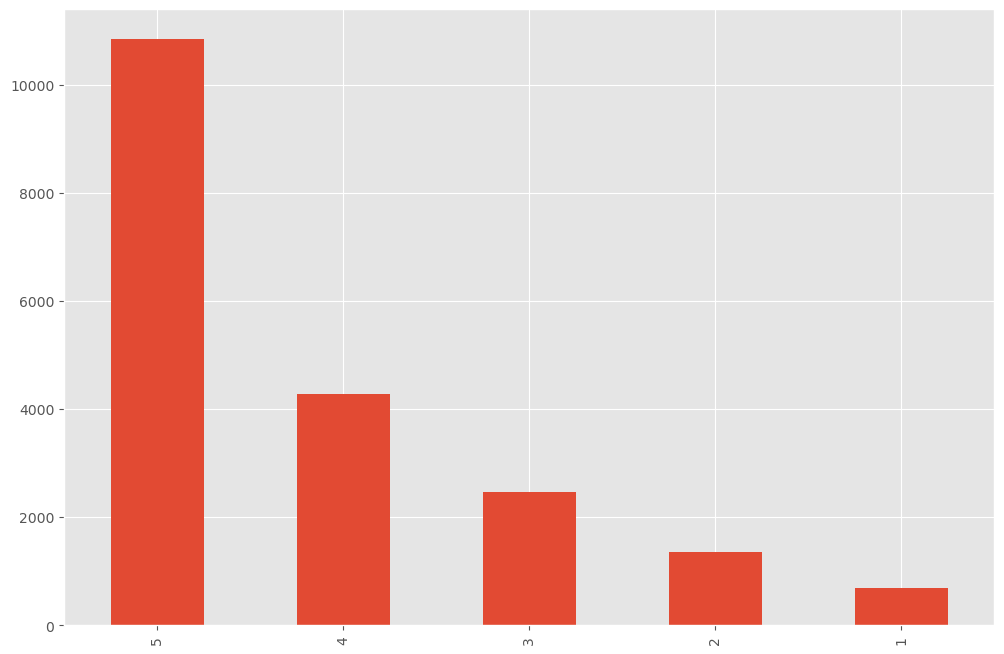

In [18]:
# bar chart -  distribution of a categorical variable
df_less_title['Rating'].value_counts().plot.bar()

Which of the three techniques helped you find any outliers? Now that you have found outliers, what will you do to solve the problem?

In [19]:
# Handle any outliers in your dataframe

## Unnecessary Data

Unnecessary data could be duplicates, irrelevant, or any uninformative data. Dive into each type of unnecessary data to see if there is any in the data set. Make sure to make note of how you would handle each type of unnecessary data.

In [20]:
# Look for any irrelevant data in the dataframe. How will you handle it?
num_rows = len(df.index)
low_information_cols = [] #

for col in df_less_title.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Review Text_ismissing: 96.40211%
False    22641
True       845
Name: Review Text_ismissing, dtype: int64

Division Name_ismissing: 99.94039%
False    23472
True        14
Name: Division Name_ismissing, dtype: int64

Department Name_ismissing: 99.94039%
False    23472
True        14
Name: Department Name_ismissing, dtype: int64

Class Name_ismissing: 99.94039%
False    23472
True        14
Name: Class Name_ismissing, dtype: int64



In [21]:
# Look for duplicates. How will you handle any duplicates?


In [24]:
key = ['Clothing ID', 'Age', 'Rating', 'Recommended IND', 'Positive Feedback Count', 'Review Text']
df_dedupped2 = df_less_title.drop_duplicates(subset=key)

print(df.shape)
print(df_less_title.shape)

(23486, 17)
(19662, 16)


In [26]:
# categorical
df_less_title['Review Text'] = df_less_title['Review Text'].fillna('_MISSING_')


In [27]:
# Think about what data in the dataframe may be uninformative. Make note here of what situations may render data uninformative and how you would handle it?

#Unnamed column will not be useful, so I would like to drop it.


## Inconsistent Data

Inconsistent data is anything that messes with your model. This is likely due to inconsistent formatting and can be addressed by re-formatting all values in a column or row.

In [ ]:
# Try to convert all the strings in a column to lower or upper case. 
# make everything lower case.
df['Review Text'] = df['Review Text'].str.lower()
df['Review Text'].value_counts(dropna=False)